In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional but recommended
sns.set_style("whitegrid")

# Load enriched dataset
india_df = pd.read_csv("data/processed/india_t20i_matches_enriched.csv")

india_df.head()

,match_id,date,team1,team2,venue,city,winner,toss_winner,toss_decision,event,opponent,india_result,year,india_won_toss,india_batted_first
0,1065348,04-12-2016,India,Pakistan,Asian Institute of Technology Ground,Bangkok,India,India,bat,Asian Cricket Council Women's Twenty20 Asia Cup,Pakistan,Win,2016,True,True
1,1123206,13-02-2018,South Africa,India,Senwes Park,Potchefstroom,India,India,field,India Women tour of South Africa,South Africa,Win,2018,True,False
2,1123207,16-02-2018,South Africa,India,Buffalo Park,East London,India,India,field,India Women tour of South Africa,South Africa,Win,2018,True,False
3,1123208,18-02-2018,India,South Africa,The Wanderers Stadium,Johannesburg,South Africa,South Africa,field,India Women tour of South Africa,South Africa,Loss,2018,False,True
4,1123209,21-02-2018,South Africa,India,SuperSport Park,Centurion,NaN,India,field,India Women tour of South Africa,South Africa,No Result,2018,True,False


In [4]:
total_matches = india_df.shape[0]
print("Total Matches:", total_matches)

Total Matches: 158


1. Win Percentage

In [6]:
result_counts = india_df["india_result"].value_counts()
print(result_counts)

win_percentage = (result_counts["Win"] / total_matches) * 100
print("Win Percentage:", round(win_percentage, 2), "%")

india_result
Win          87
Loss         64
No Result     7
Name: count, dtype: int64
Win Percentage: 55.06 %


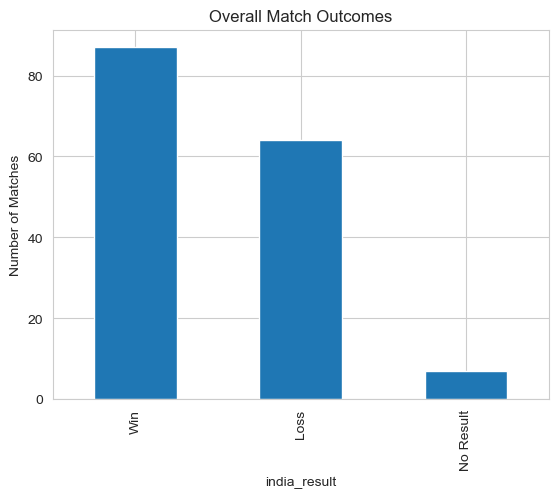

In [8]:
result_counts.plot(kind="bar")
plt.title("Overall Match Outcomes")
plt.ylabel("Number of Matches")
plt.show()

2. Win % by Year

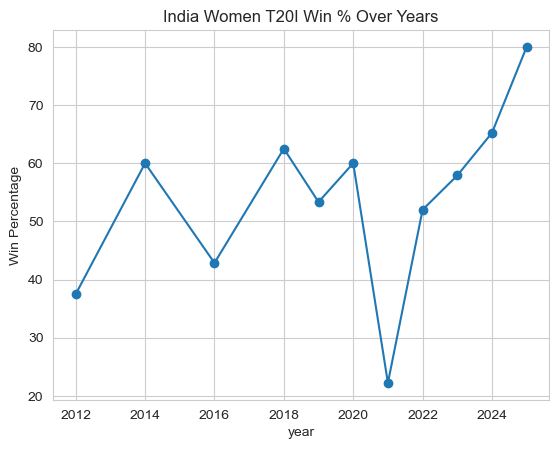

In [10]:
yearly = india_df.groupby("year")["india_result"] \
    .value_counts(normalize=True) \
    .unstack() * 100

yearly["Win"].plot(marker="o")
plt.title("India Women T20I Win % Over Years")
plt.ylabel("Win Percentage")
plt.show()


3. Win % vs Each Opponent

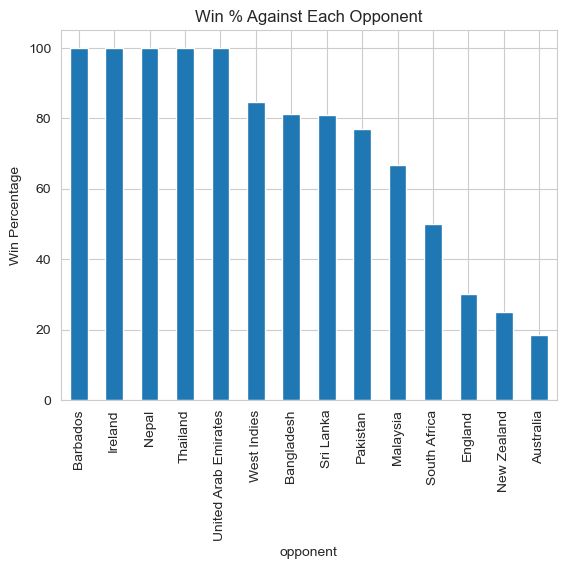

In [12]:
opponent_performance = india_df.groupby("opponent")["india_result"] \
    .value_counts(normalize=True) \
    .unstack() * 100

opponent_performance["Win"].sort_values(ascending=False).plot(kind="bar")
plt.title("Win % Against Each Opponent")
plt.ylabel("Win Percentage")
plt.show()


4. Win % When India Wins Toss

In [14]:
toss_analysis = pd.crosstab(
    india_df["india_won_toss"],
    india_df["india_result"],
    normalize="index"
) * 100

toss_analysis

india_result,Loss,No Result,Win
india_won_toss,,,
False,41.860465,2.325581,55.813953
True,38.888889,6.944444,54.166667


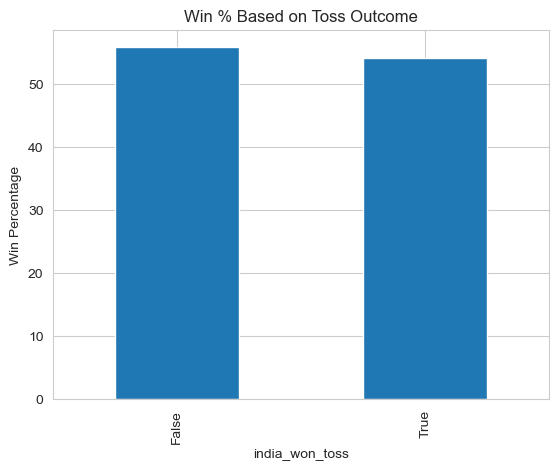

In [16]:
toss_analysis["Win"].plot(kind="bar")
plt.title("Win % Based on Toss Outcome")
plt.ylabel("Win Percentage")
plt.show()

5. Win % Based on Batting Order

In [18]:
batting_analysis = pd.crosstab(
    india_df["india_batted_first"],
    india_df["india_result"],
    normalize="index"
) * 100

batting_analysis

india_result,Loss,No Result,Win
india_batted_first,,,
False,40.000000,5.333333,54.666667
True,40.963855,3.614458,55.421687


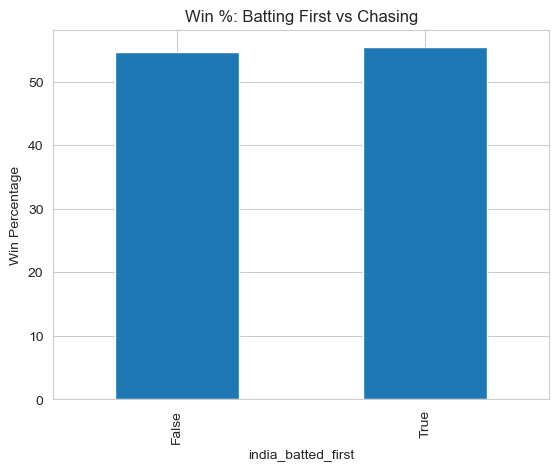

In [20]:
batting_analysis["Win"].plot(kind="bar")
plt.title("Win %: Batting First vs Chasing")
plt.ylabel("Win Percentage")
plt.show()

6. Tournament Performance

In [22]:
event_performance = india_df.groupby("event")["india_result"] \
    .value_counts(normalize=True) \
    .unstack() * 100

event_performance["Win"].sort_values(ascending=False).head(10)


event
Asian Cricket Council Women's Twenty20 Asia Cup    100.000000
Sri Lanka Women tour of India                      100.000000
India Women tour of West Indies                    100.000000
India Women tour of Bangladesh                      87.500000
Women's Asia Cup                                    84.615385
India Women tour of Sri Lanka                       71.428571
ICC Women's T20 World Cup                           68.421053
Women's Twenty20 Asia Cup                           66.666667
West Indies Women tour of India                     66.666667
Asian Games Women's Cricket Competition             66.666667
Name: Win, dtype: float64